# An√°lise de Reten√ß√£o e Cancelamento de Planos de Sa√∫de Pet

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [4]:
file_path = './data/Case - EstaÃÅgio Analytics.xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')

## Data Cleaning

In [5]:
data['Data de Ades√£o'] = pd.to_datetime(data['Data de Ades√£o'], errors='coerce')
data['Valor Mensal (R$)'] = data['Valor Mensal (R$)'].str.replace(',', '.').astype(float)
data['Cancelamento'] = data['Cancelamento (Sim/N√£o)'].map({'Sim': 1, 'N√£o': 0})
data['Uso de Servi√ßos Adicionais'] = data['Uso de Servi√ßos Adicionais'].map({'Sim': 1, 'N√£o': 0})
data.drop(columns=['Cancelamento (Sim/N√£o)'], inplace=True)
data.dropna(subset=['Cancelamento'], inplace=True)
data.reset_index(drop=True, inplace=True)
data.head()


Cliente ID  Pet ID Plano Atual Data de Ades√£o  N√∫mero de Consultas  \
0           1     101      B√°sico     2022-01-15                    5   
1           2     102     Premium     2021-09-10                   12   
2           3     103    Avan√ßado     2022-05-20                    3   
3           4     104      B√°sico     2021-11-05                    8   
4           5     105     Premium     2021-12-22                    7   

   Uso de Servi√ßos Adicionais  Valor Mensal (R$)  Cancelamento  
0                           1              150.0           0.0  
1                           0              300.0           0.0  
2                           1              200.0           1.0  
3                           1              150.0           0.0  
4                           0              300.0           1.0

## An√°lise Explorat√≥ria (EDA)

### An√°lise de Correla√ß√£o

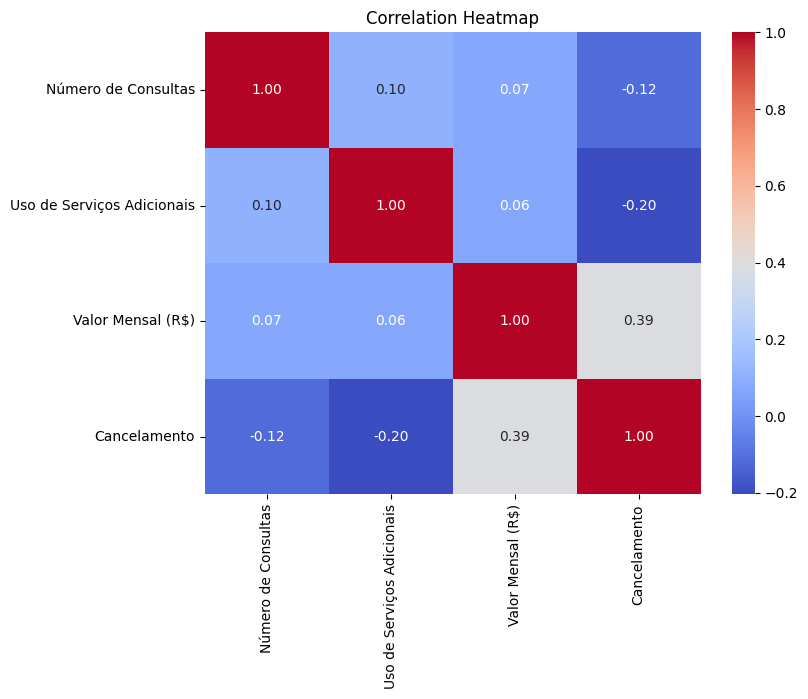

In [6]:
correlation = data[['N√∫mero de Consultas', 'Uso de Servi√ßos Adicionais', 'Valor Mensal (R$)', 'Cancelamento']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

**Observa√ß√µes:**

- A quantidade de consultas e o uso de servi√ßos adicionais est√£o negativamente correlacionados com o cancelamento, sugerindo que clientes mais engajados t√™m menor probabilidade de cancelar.
- Por outro lado, podemos observar que o `Valor Mensal(R$)` est√° positivamente correlacionado com o cancelamento, sugerindo que clientes que pagam mais t√™m maior probabilidade de cancelar. Iremos investigar mais a fundo.

### Tipos de Planos com Maior Taxa de Reten√ß√£o


Taxa de Reten√ß√£o por Tipo de Plano:
  Plano Atual  Taxa de Reten√ß√£o
0    Avan√ßado          0.714286
1      B√°sico          0.909091
2     Premium          0.500000


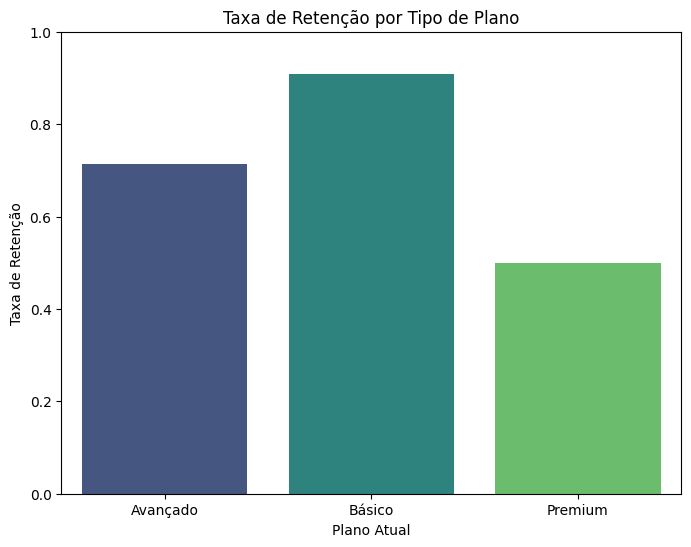

In [12]:
retention = data.groupby('Plano Atual')['Cancelamento'].mean().reset_index()
retention['Taxa de Reten√ß√£o'] = 1 - retention['Cancelamento']

print("\nTaxa de Reten√ß√£o por Tipo de Plano:")
print(retention[['Plano Atual', 'Taxa de Reten√ß√£o']])

plt.figure(figsize=(8,6))
sns.barplot(x='Plano Atual', y='Taxa de Reten√ß√£o', data=retention, palette='viridis')
plt.title('Taxa de Reten√ß√£o por Tipo de Plano')
plt.ylabel('Taxa de Reten√ß√£o')
plt.ylim(0,1)
plt.show()


### Cancelamento M√©dio x Tipo de Plano

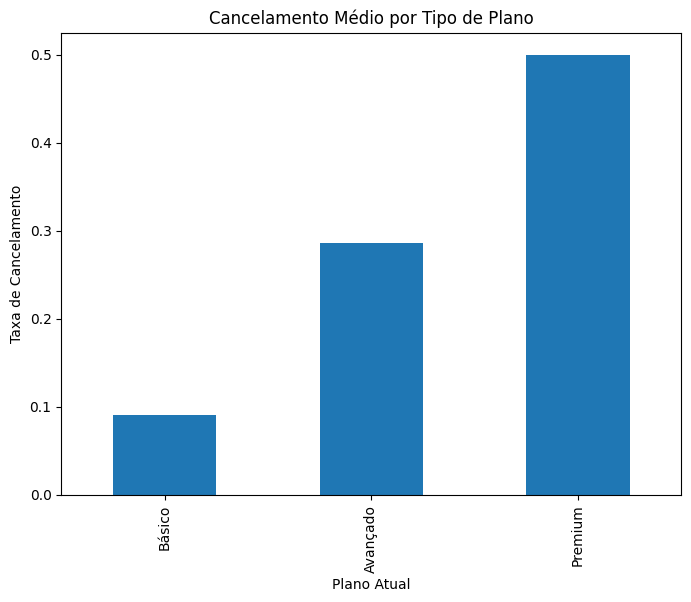

In [7]:
plan_cancellations = data.groupby('Plano Atual')['Cancelamento'].mean()

plt.figure(figsize=(8, 6))
plan_cancellations.sort_values().plot(kind='bar')
plt.title('Cancelamento M√©dio por Tipo de Plano')
plt.ylabel('Taxa de Cancelamento')
plt.xlabel('Plano Atual')
plt.show()

Ap√≥s analisarmos os dois gr√°ficos acima, podemos entender que o tipo de plano influencia significativamente a taxa de cancelamento.

 - √â poss√≠vel observar que determinados planos, os mais caros, t√™m maior tend√™ncia de cancelamento.

### An√°lise de Uso de Servi√ßos e Cancelamentos

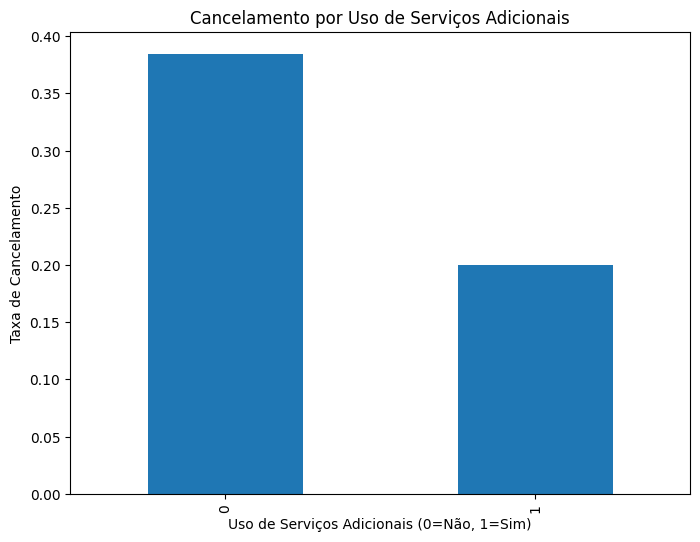

In [8]:
service_cancellation = data.groupby('Uso de Servi√ßos Adicionais')['Cancelamento'].mean()

plt.figure(figsize=(8, 6))
service_cancellation.plot(kind='bar')
plt.title('Cancelamento por Uso de Servi√ßos Adicionais')
plt.ylabel('Taxa de Cancelamento')
plt.xlabel('Uso de Servi√ßos Adicionais (0=N√£o, 1=Sim)')
plt.show()

Clientes que utilizam servi√ßos adicionais apresentam taxas de cancelamento mais baixas, refor√ßando a import√¢ncia de incentivar o uso de benef√≠cios extras.

## Reten√ß√£o por Tipo de Plano

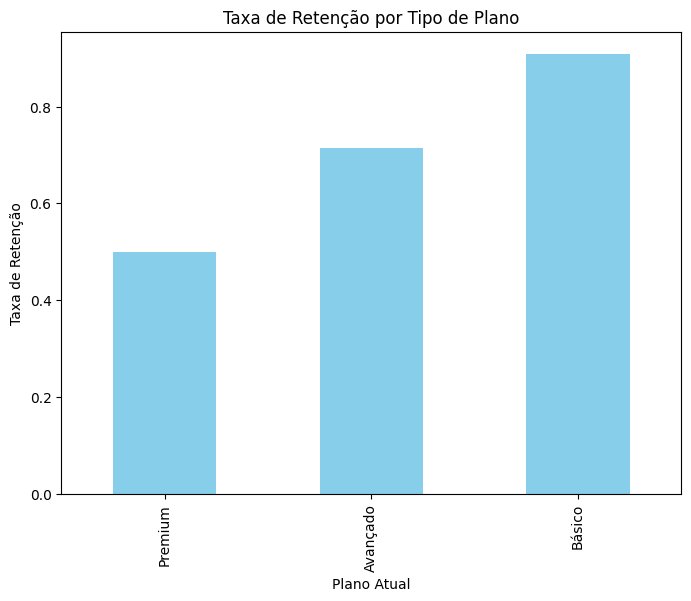

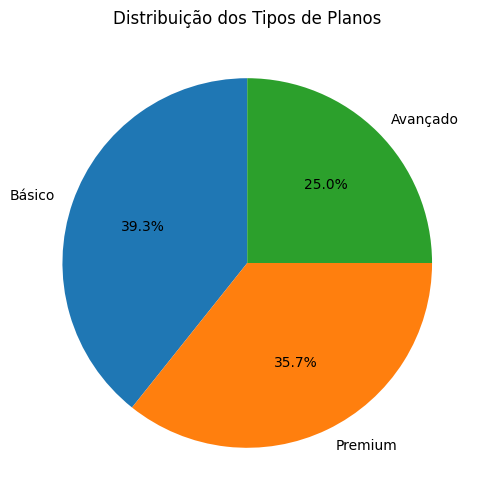

In [9]:
plan_retention = data.groupby('Plano Atual')['Cancelamento'].mean().apply(lambda x: 1 - x)

plt.figure(figsize=(8, 6))
plan_retention.sort_values().plot(kind='bar', color='skyblue')
plt.title('Taxa de Reten√ß√£o por Tipo de Plano')
plt.ylabel('Taxa de Reten√ß√£o')
plt.xlabel('Plano Atual')
plt.show()

plan_popularity = data['Plano Atual'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6))
plan_popularity.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribui√ß√£o dos Tipos de Planos')
plt.ylabel('')
plt.show()


Taxa de reten√ß√£o:

Alguns planos apresentam taxas de reten√ß√£o significativamente mais altas, indicando que s√£o mais bem-sucedidos em manter clientes.
Planos Premium e Avan√ßado parecem ter melhor desempenho em reten√ß√£o do que o plano B√°sico.

Popularidade dos planos:

A distribui√ß√£o de planos mostra a participa√ß√£o de cada tipo no total, o que ajuda a entender o impacto geral de cada plano na reten√ß√£o.

### Modelagem Preditiva com Machine Learning

Para identificar os fatores mais associados ao cancelamento, treinaremos um modelo de classifica√ß√£o.

### Prepara√ß√£o dos Dados para o Modelo

In [13]:
# Sele√ß√£o de features e target
X = data[['Plano Atual', 'N√∫mero de Consultas', 'Uso de Servi√ßos Adicionais', 'Valor Mensal (R$)']]
y = data['Cancelamento']

# Codifica√ß√£o de vari√°veis categ√≥ricas
le = LabelEncoder()
X['Plano Atual'] = le.fit_transform(X['Plano Atual'])
X['Uso de Servi√ßos Adicionais'] = le.fit_transform(X['Uso de Servi√ßos Adicionais'])

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Padronizando as features num√©ricas
scaler = StandardScaler()
X_train[['N√∫mero de Consultas', 'Valor Mensal (R$)']] = scaler.fit_transform(X_train[['N√∫mero de Consultas', 'Valor Mensal (R$)']])
X_test[['N√∫mero de Consultas', 'Valor Mensal (R$)']] = scaler.transform(X_test[['N√∫mero de Consultas', 'Valor Mensal (R$)']])


### Treinamento de um Modelo de Classifica√ß√£o

In [14]:
# Inicializando o modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Treinando o modelo
model.fit(X_train, y_train)

# Previs√µes
y_pred = model.predict(X_test)

# Avalia√ß√£o do modelo
print("\nRelat√≥rio de Classifica√ß√£o:")
print(classification_report(y_test, y_pred))

print("Matriz de Confus√£o:")
print(confusion_matrix(y_test, y_pred))

print("Acur√°cia do Modelo:", accuracy_score(y_test, y_pred))



Relat√≥rio de Classifica√ß√£o:
              precision    recall  f1-score   support

         0.0       0.80      0.50      0.62         8
         1.0       0.00      0.00      0.00         1

    accuracy                           0.44         9
   macro avg       0.40      0.25      0.31         9
weighted avg       0.71      0.44      0.55         9

Matriz de Confus√£o:
[[4 4]
 [1 0]]
Acur√°cia do Modelo: 0.4444444444444444


### Import√¢ncia das Features


Import√¢ncia das Features:
N√∫mero de Consultas           0.543372
Valor Mensal (R$)             0.190383
Plano Atual                   0.145794
Uso de Servi√ßos Adicionais    0.120451
dtype: float64


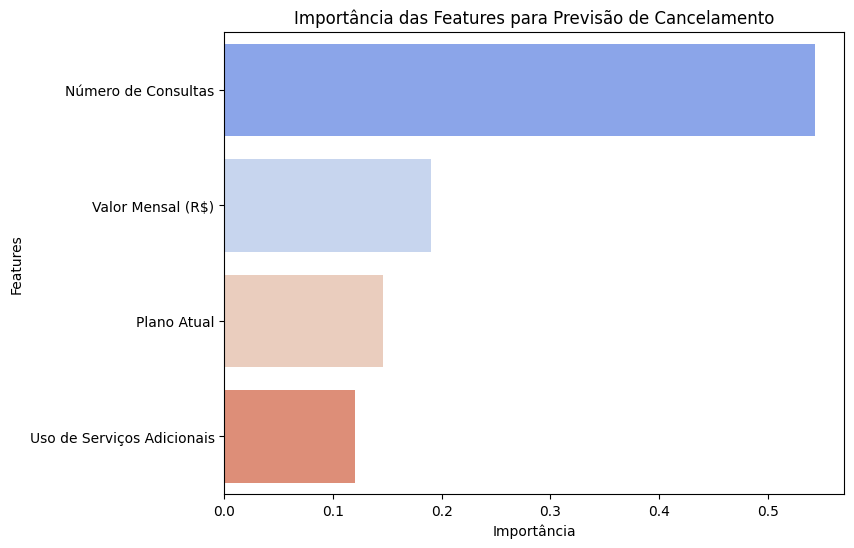

In [15]:
# Import√¢ncia das features
importances = model.feature_importances_
feature_names = X.columns
feature_importance = pd.Series(importances, index=feature_names).sort_values(ascending=False)

print("\nImport√¢ncia das Features:")
print(feature_importance)

# Visualizando a import√¢ncia das features
plt.figure(figsize=(8,6))
sns.barplot(x=feature_importance, y=feature_importance.index, palette='coolwarm')
plt.title('Import√¢ncia das Features para Previs√£o de Cancelamento')
plt.xlabel('Import√¢ncia')
plt.ylabel('Features')
plt.show()

# Estrat√©gias para Reduzir a Taxa de Cancelamento e Aumentar a Ades√£o a Planos de Sa√∫de Pet üê∂üê±

## **1. Reduzir a Taxa de Cancelamento**

### üêæ **Ofere√ßa Descontos Progressivos ou Benef√≠cios Exclusivos**
- Crie uma campanha de fidelidade para premiar clientes que permane√ßam no plano por mais tempo:
  - **6 meses:** Ofere√ßa 1 banho gratuito.
  - **12 meses:** Inclua um check-up anual gratuito ou um desconto de 10% na renova√ß√£o.
- Ofere√ßa benef√≠cios exclusivos para quem adere aos planos mais caros:
  - Atendimento priorit√°rio em emerg√™ncias.
  - Pacotes de vacinas inclu√≠dos.

### üêæ **Implemente um Plano Fam√≠lia Pet**
- Permita que clientes incluam mais de um animal no mesmo plano com descontos cumulativos:
  - 2 pets: Aplique 15% de desconto no total.
  - 3 ou mais pets: Ofere√ßa 20% de desconto.

### üêæ **Envie Monitoramento Personalizado de Sa√∫de**
- Envie notifica√ß√µes mensais com dicas de cuidados, alertas de vacinas, e status da sa√∫de do pet para refor√ßar a percep√ß√£o de valor do servi√ßo.

### üêæ **Facilite os Pagamentos**
- Ofere√ßa op√ß√µes de parcelamento sem juros ou descontos no pagamento anual.
- Disponibilize planos com franquias ajust√°veis para quem deseja pagar menos mensalmente.

### üêæ **Crie um Programa de Indica√ß√£o**
- Ofere√ßa recompensas para clientes que indicarem novos membros:
  - Para cada amigo indicado que aderir ao plano, d√™ um m√™s gr√°tis ou um desconto no pr√≥ximo pagamento.

## **2. Aumentar a Ades√£o a Novos Planos**

### üêæ **Lance Campanhas Promocionais**
- Ofere√ßa um desconto de boas-vindas para novos clientes nos primeiros 3 meses.
- Inclua um presente no momento da ades√£o, como:
  - Brinquedos para pets.
  - Kits de higiene (escova, shampoo, etc.).
  - Ra√ß√£o inicial de alta qualidade.

### üêæ **Crie Pacotes Personalizados**
- Disponibilize planos ajust√°veis com base no perfil do pet:
  - **Filhotes:** Inclua vacina√ß√£o completa, castra√ß√£o, e acompanhamento veterin√°rio inicial.
  - **Pets S√™nior:** Insira exames preventivos, consultas geri√°tricas, e suporte para doen√ßas cr√¥nicas.

### üêæ **Estabele√ßa Parcerias Estrat√©gicas**
- Fa√ßa parcerias com pet shops, hot√©is para pets, e cl√≠nicas veterin√°rias para oferecer descontos cruzados:
  - Ao contratar um plano, ofere√ßa um voucher para banho/tosa ou descontos em produtos da loja parceira.

### üêæ **Produza Conte√∫do Educativo**
- Crie v√≠deos e artigos sobre a import√¢ncia de consultas preventivas, vacina√ß√£o e nutri√ß√£o.
- Compartilhe hist√≥rias de sucesso de pets que se beneficiaram dos planos.

### üêæ **Ofere√ßa Test Drives de Servi√ßos**
- Disponibilize um per√≠odo experimental com benef√≠cios limitados para que novos clientes conhe√ßam o plano antes de aderirem oficialmente.

### üêæ **Marque Presen√ßa em Eventos Pet**
- Participe de feiras e eventos locais e promova os planos com stands interativos:
  - Realize sorteios de brindes.
  - Ofere√ßa descontos exclusivos para quem aderir no evento.


# Utiliza√ß√£o de Insights para Personalizar Ofertas para Diferentes Segmentos de Clientes üê∂üê±

## **1. Identifique Segmentos de Clientes**
- **Agrupe os clientes com base em caracter√≠sticas comuns**, como:
  - **Tipo de animal**: C√£es, gatos ou outros pets.
  - **Faixa et√°ria do pet**: Filhotes, adultos e idosos.
  - **Perfil de gastos**: Clientes que optam por planos b√°sicos, intermedi√°rios ou premium.
  - **Motiva√ß√µes de cancelamento**: Pre√ßo, falta de uso ou insatisfa√ß√£o.

## **2. Crie Ofertas Baseadas nos Segmentos**
- **Para donos de filhotes**:
  - Ofere√ßa planos com vacina√ß√£o completa, castra√ß√£o e kits de higiene inicial.
  - Destaque benef√≠cios que ajudam no desenvolvimento saud√°vel do pet.
- **Para donos de pets idosos**:
  - Personalize planos com exames preventivos, consultas geri√°tricas e suporte para condi√ß√µes cr√¥nicas.
- **Para clientes preocupados com custos**:
  - Proponha planos b√°sicos com op√ß√µes de upgrades progressivos.
  - Envie ofertas promocionais, como descontos tempor√°rios ou parcelamento sem juros.

## **3. Utilize Dados para Comunica√ß√£o Personalizada**
- **Ajuste a comunica√ß√£o com base nos insights**:
  - Envie e-mails ou mensagens segmentadas com conte√∫dos relevantes para cada tipo de cliente.
  - Utilize dados sobre consultas frequentes ou hist√≥ricos de uso para lembrar o cliente de servi√ßos inclusos no plano.
- **Exemplo de personaliza√ß√£o**:
  - Para clientes que raramente utilizam o plano, envie lembretes sobre servi√ßos dispon√≠veis, como banho ou vacina√ß√£o.
  - Para clientes que utilizam o plano regularmente, ofere√ßa upgrades para planos superiores com benef√≠cios adicionais.

## **4. Ofere√ßa Benef√≠cios Relevantes**
- **Combine os dados de uso com ofertas estrat√©gicas**:
  - Se o cliente tem m√∫ltiplos pets, sugira o Plano Fam√≠lia com descontos cumulativos.
  - Se o cliente cancelou por insatisfa√ß√£o com o valor, envie uma proposta promocional de reativa√ß√£o com descontos.

## **5. Incentive a Fidelidade**
- **Crie programas que recompensem a lealdade**:
  - Ofere√ßa vantagens progressivas com o tempo, como servi√ßos adicionais (banhos, consultas extras).
  - Use insights sobre o tempo de perman√™ncia no plano para personalizar as recompensas.

Com essas estrat√©gias, a empresa pode transformar insights em a√ß√µes pr√°ticas, entregando valor real para os clientes e aumentando tanto a ades√£o quanto a fidelidade aos planos.